# Required Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras
print("Keras version: ", keras.__version__)
print("TensorFlow version: ", tf.__version__)



Keras version:  2.15.0
TensorFlow version:  2.15.0


# Reading Data Set 

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays

In [3]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting training and testing dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [5]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()

# Compilation of the model

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Epoch 1/15


981/981 [==============================] - 70s 60ms/step - loss: 1.8524 - accuracy: 0.5329 - val_loss: 0.4643 - val_accuracy: 0.8845
Epoch 2/15
981/981 [==============================] - 61s 62ms/step - loss: 0.5723 - accuracy: 0.8321 - val_loss: 0.1798 - val_accuracy: 0.9549
Epoch 3/15
981/981 [==============================] - 60s 61ms/step - loss: 0.3686 - accuracy: 0.8906 - val_loss: 0.1370 - val_accuracy: 0.9603
Epoch 4/15
981/981 [==============================] - 63s 64ms/step - loss: 0.2997 - accuracy: 0.9135 - val_loss: 0.0813 - val_accuracy: 0.9763
Epoch 5/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2560 - accuracy: 0.9284 - val_loss: 0.0889 - val_accuracy: 0.9731
Epoch 6/15
981/981 [==============================] - 60s 62ms/step - loss: 0.2542 - accuracy: 0.9302 - val_loss: 0.0597 - val_accuracy: 0.9853
Epoch 7/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2300 - accuracy: 0.9383 - val_loss: 0.0576 - val_accura

INFO:tensorflow:Assets written to: my_model.tf\assets


# plotting graphs for accuracy 

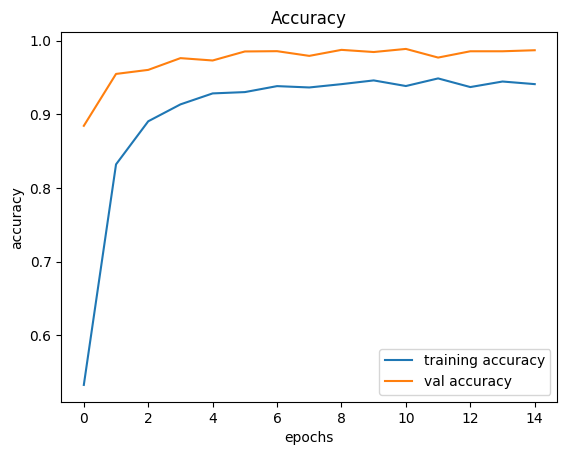

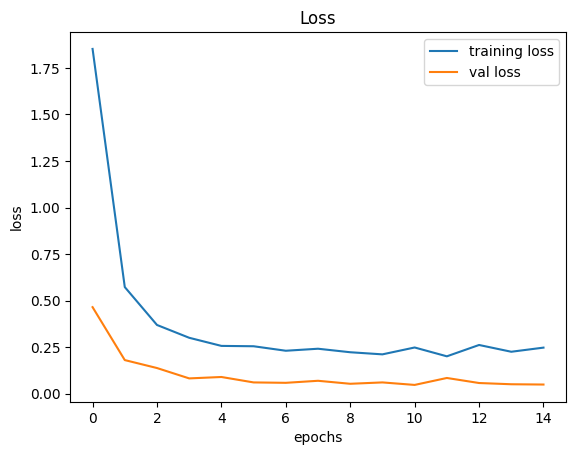

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# testing accuracy on test dataset

In [9]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=-1)

395/395 [==============================] - 7s 18ms/step


# Accuracy with the test data

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_classes))
model.save('traffic_classifier.h5')

0.9540775930324624
INFO:tensorflow:Assets written to: traffic_classifier.tf\assets


INFO:tensorflow:Assets written to: traffic_classifier.tf\assets
